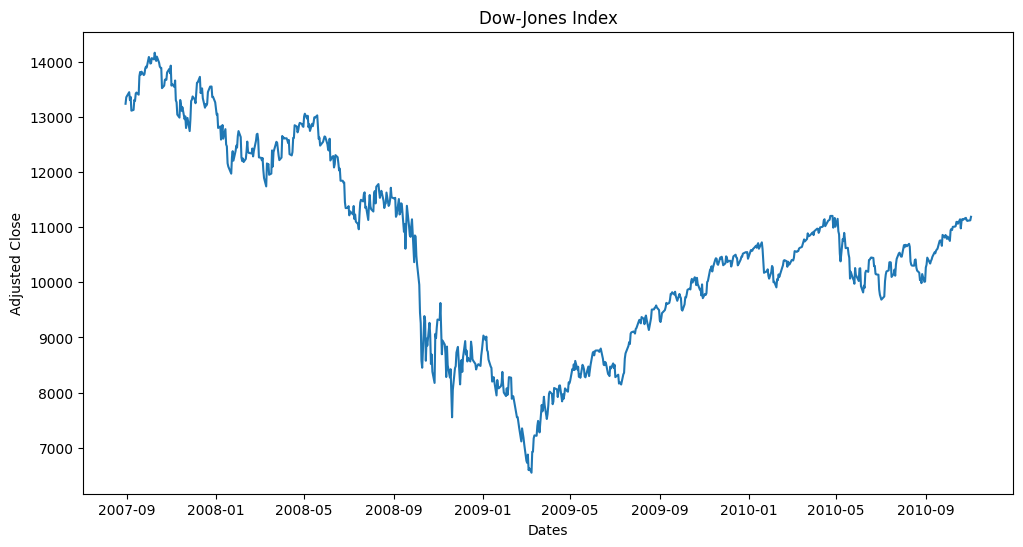

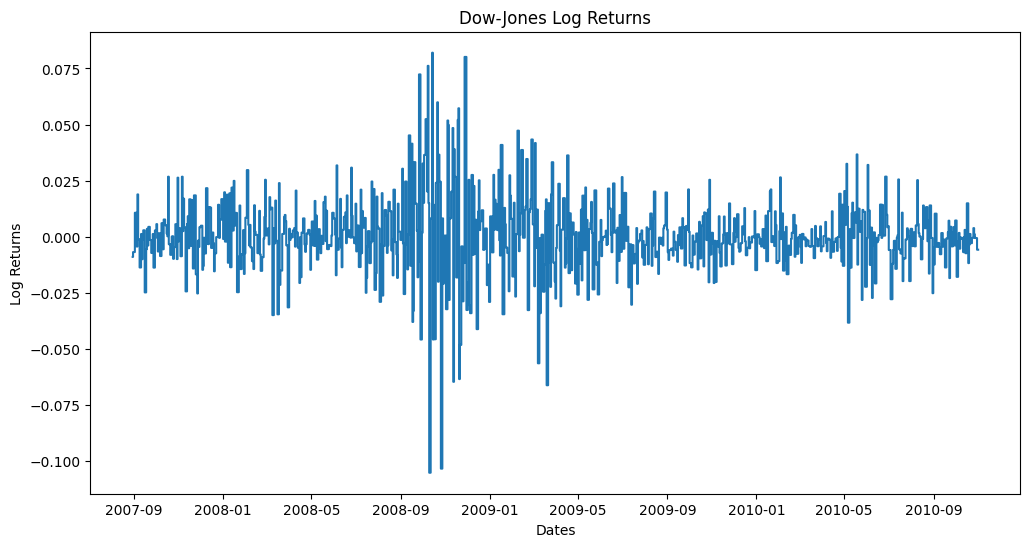

In [5]:
#####################################################
## SF2980 - Example 7.8
#####################################################

# General comments. 
# To implement the Python 3 code for Example 7.8 we
# use the sample code in "R" available at 
# https://people.kth.se/~hult/riskbook.html
# The code was transcribed to Python 3 using Open AI's Chat GPT-3.5
# available at
# https://chat.openai.com/?model=text-davinci-002-render-sha
# We used the prompt: 
# "Can you transcribe the following R-code into Python 3 code suitable for a Jupyter Notebook?"
# and then we provided the R-code. 
# We had to make some adjustments to the suggested Python code in order to get the 
# data from the csv-file into the correct format for "pandas". Then our own comments were added 
# to explain the plots/results. 


#####################################################

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data
# Loading the data contained in the file Dow_Jones.csv
data = pd.read_csv("Data/Dow_Jones.csv")
numberofdays = 801
data = data.iloc[:numberofdays]

# Convert calendar dates to pandas format
dates = pd.to_datetime(data['Date'], format='%m/%d/%y')

# Plot Dow Jones index
index = data['Adj Close']
plt.figure(figsize=(12, 6))
plt.plot(dates, index)
plt.title("Dow-Jones Index")
plt.xlabel("Dates")
plt.ylabel("Adjusted Close")
plt.show()

# Plot log returns
logret = np.diff(np.log(index))
plt.figure(figsize=(12, 6))
plt.plot(dates[1:], logret, drawstyle='steps-mid')
plt.title("Dow-Jones Log Returns")
plt.xlabel("Dates")
plt.ylabel("Log Returns")
plt.show()

# Comment: 1. Dow-Jones index. There is a noticable sharp decline in the DJ index during the financial crisis in
# third quarter of 2008 and first quarter of 2009. The financial crisis is followed by a rather stable increase
# during the second half of 2009 and 2010.
# 2. Log-returns of Dow-Jones index. The time series of log-returns does not appear to be iid. For example, 
# it contains volatility clusters meaning that the volatility (standard deviation) appears to be higher 
#during the third quarter of 2008, than in other time periods.  

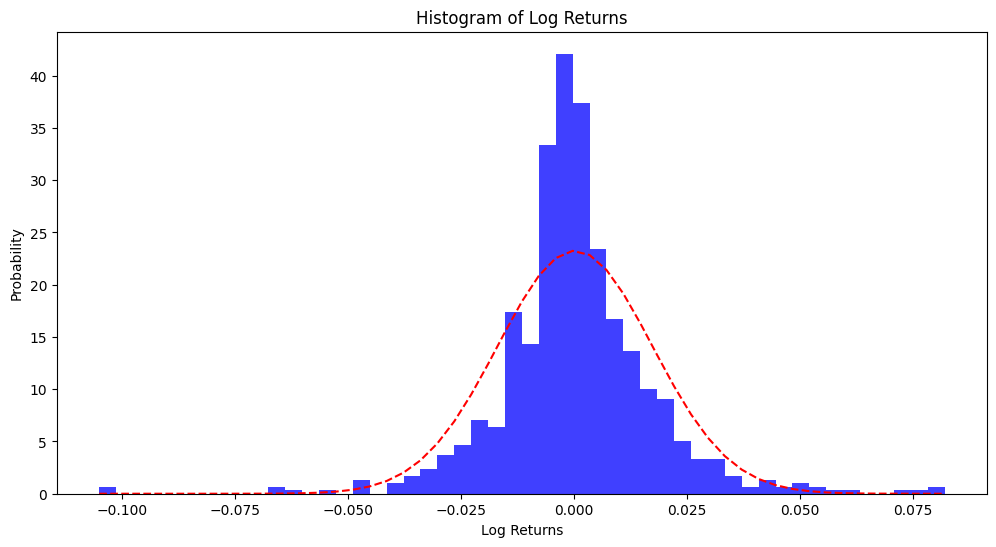

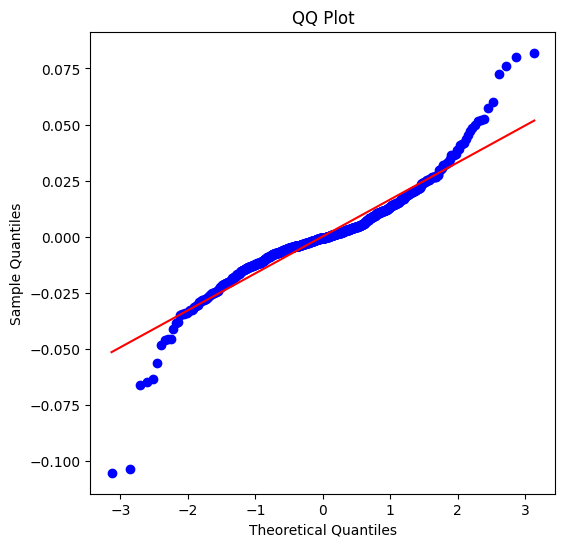

In [6]:
# Histogram of log returns
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(logret, bins=50, density=True, alpha=0.75, color='blue')
mu = np.mean(logret)
sigma = np.std(logret)
pdf = norm.pdf(bins, mu, sigma)
plt.plot(bins, pdf, 'r--')
plt.title("Histogram of Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Probability")
plt.show()

# Comment: Compared to the fitted Normal distribution the histogram of the daily log-returns are more peaked 
# around the mean and appears to have a heavier tail, because of the rather extreme positive and negative 
# observations. 


# QQ plot
from scipy.stats import probplot
plt.figure(figsize=(6, 6))
probplot(logret, plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot")
plt.show()

# Comment. The QQ-plot vs standard normal quantiles shows that the empirical distribution of the 
# log-returns has heavier tails than the normal distribution, both for positive returns and negative returns. The 
# QQ-plot shows that it would probably be better to model the log-return distribution with a Student's t-distribution
# or a polynomial normal model. 



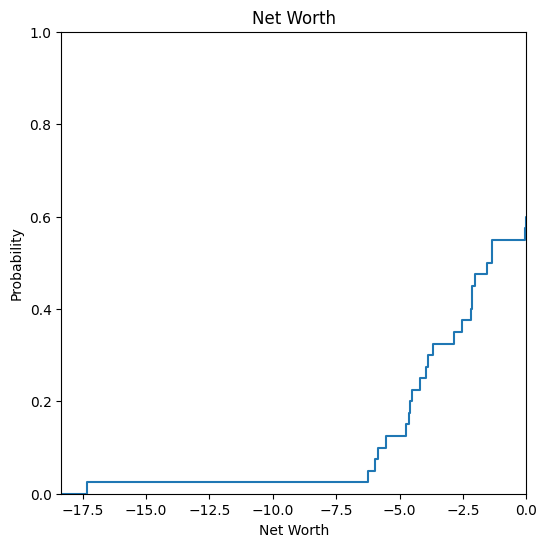

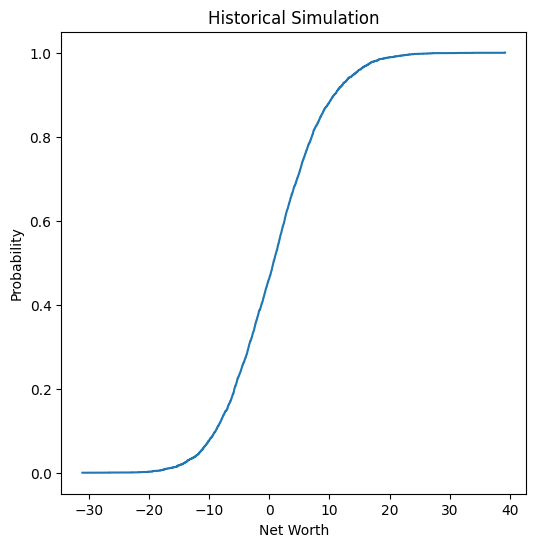

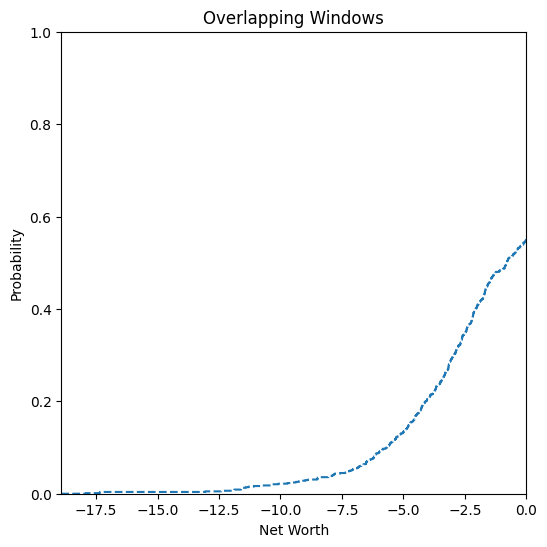

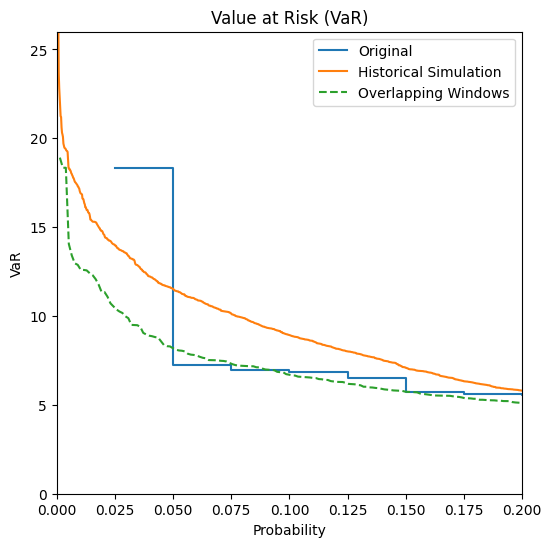

In [7]:

# Constructing 20-day log-returns by thinning
newindex = np.array([index[i] for i in range(0, len(index), 20)])
newlogret = np.diff(np.log(newindex))

# Plot of net worth
n = len(newlogret)
networth = 100 * (np.exp(newlogret) - 1)
snw = np.sort(networth)
stair = np.arange(1, n+1) / n

plt.figure(figsize=(6, 6))
plt.plot(np.insert(snw, 0, snw[0] - 1), np.insert(stair, 0, 0), drawstyle='steps-post')
plt.title("Net Worth")
plt.xlabel("Net Worth")
plt.ylabel("Probability")
plt.ylim([0, 1])
plt.xlim([snw[0] - 1, 0])
plt.show()

# Comment. By constructing non-overlapping segments of 20-day log-returns reduces the sample size to 40. 
# The small sample size makes the left tail of the empirical distribution of the future net worth unstable. 

# Historical simulation
N = 5000
sample = np.array([np.sum(np.random.choice(logret, 20)) for _ in range(N)])
hlosses = 100 * (np.exp(sample) - 1)
hsnw = np.sort(hlosses)
hstair = np.arange(1, N+1) / N

plt.figure(figsize=(6, 6))
plt.plot(hsnw, hstair, drawstyle='steps-post')
plt.title("Historical Simulation")
plt.xlabel("Net Worth")
plt.ylabel("Probability")
plt.show()

# Comment. Using historical simulation with sample size 5000 makes the left tail of the empirical distribution of the future net worth 
# more stable. However, the time dependence is lost which implies that the effect of volatility clusters are not 
# we captured in the historical simulation approach. 

# Overlapping windows
ovlogret = np.array([np.log(index[k + 20] / index[k]) for k in range(numberofdays - 20)])
ovnetworth = 100 * (np.exp(ovlogret) - 1)
ovsnw = np.sort(ovnetworth)
ovstair = np.arange(1, len(ovsnw) + 1) / len(ovsnw)

plt.figure(figsize=(6, 6))
plt.plot(np.insert(ovsnw, 0, ovsnw[0] - 1), np.insert(ovstair, 0, 0), drawstyle='steps-post', linestyle='dashed')
plt.title("Overlapping Windows")
plt.xlabel("Net Worth")
plt.ylabel("Probability")
plt.ylim([0, 1])
plt.xlim([ovsnw[0] - 1, 0])
plt.show()

# Comment. Using overlapping windows reduces the sample size from 800 days to 780 intervals of length 20. Still 
# a fairly large sample size. However, the 20-day intervals are not independent, because adjacent intervals contains
# mostly identical observations. The overlapping windows approach is more stable than the thinning approach but keeps
# the time dependence present in the original data. 


# Plot of VaR
plt.figure(figsize=(6, 6))
plt.plot(stair, -snw + 1, drawstyle='steps-post', label='Original')
plt.plot(hstair, -hsnw, label='Historical Simulation')
plt.plot(ovstair, -ovsnw + 1, linestyle='dashed', label='Overlapping Windows')
plt.title("Value at Risk (VaR)")
plt.xlabel("Probability")
plt.ylabel("VaR")
plt.xlim([0, 0.2])
plt.ylim([0, 26])
plt.legend()
plt.show()

# By plotting the VaR_p as a function of p we may compare the three aproaches. In this picture we may also represent 
# Expected Shortfall at level p as the area under the curve, divided by p. We see that for quantiles above 0.05
# the thinning and overlapping windows approach give similar results, whereas the historical simulation generally
# gives higher estimates for VaR_p. 